<a href="https://colab.research.google.com/github/jamshid1255/ADALINE-on-iris-dataset-code-in-Python-/blob/master/Reinforcement_Learning_for_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Drive with Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import basic Libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset
col_list = ["Date","Open","High","Low","Close","Adj Close","Volume"]
data = pd.read_csv('/content/drive/MyDrive/CCTA Presentation and Project/ETH-USD.csv', usecols=col_list)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
# Convert the date to the Index
data = data.set_index(pd.DatetimeIndex(data['Date'].values))

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2017-11-09,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


### Create variable for N data to predict the future

In [ ]:
# Create variable for N data to predict the future
future_days = 5

In [ ]:
# Create a new column this column will contain our target
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

data[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2017-11-09,320.884003,337.631012
2017-11-10,299.252991,333.356995
2017-11-11,314.681000,330.924011
2017-11-12,307.907990,332.394012
2017-11-13,316.716003,347.612000
...,...,...
2022-04-24,2922.732666,NaN
2022-04-25,3009.393555,NaN
2022-04-26,2808.298340,NaN
2022-04-27,2888.929688,NaN


In [ ]:
# Remove the last 5 days data from the dataset we will predict by ourself
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_days]
X

array([[ 320.884003],
       [ 299.252991],
       [ 314.681   ],
       ...,
       [2987.480713],
       [2964.835693],
       [2938.114014]])

In [ ]:
# let's make y dataset (target)

y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
y

array([ 337.631012,  333.356995,  330.924011, ..., 2808.29834 ,
       2888.929688, 2879.540283])

In [ ]:
# split the data to tain and test

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
# Using SVR for the model

from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
# Let's check the performance of the model
svr_rbf_confiednce = svr_rbf.score(X_test, y_test)

print('svr_rbf Accuracy: ', np.round(svr_rbf_confiednce*100,2), '%')

svr_rbf Accuracy:  97.55 %


In [ ]:
# now checking the predicted values and actual values
svm_prediction = svr_rbf.predict(X_test)
print(svm_prediction)


[ 196.75736088  621.755457    233.24684487 2839.53428802  298.44869096
  267.15810075  211.54599276  211.65383008 2668.63346035  467.85928268
 3327.69848268  287.69270355  302.79081457  181.47673349  615.06267388
 2684.57373089 3038.59709275 3116.89847963  213.46364312  826.08304672
 4027.51432283  230.87336335  227.40496722 3295.01878751  173.87330687
 2873.50158166  215.94354608  604.85696082  735.81155592  479.88307678
 1455.74010596 4337.59129428 3449.08971773  523.05837928 4194.55952012
  120.53417312  621.47902057  547.49580647 2223.90908164  771.81426919
  451.27341989  128.65060878 2607.18108813 4096.44120163  173.21866316
  467.34779485  165.63935659  180.23634967 3996.94418427  540.97402638
  148.73080555 2509.90859356 1761.64847517 3239.16233233  164.18475457
  135.68700278  230.17207519 2681.85712126  470.34008528  199.51903833
  228.48555949 2647.47441404 1271.77118964  265.34819228 4102.55391278
 3187.13109782  134.10157755 3119.85572624  143.98701798  640.12343515
  268.

In [ ]:
print(y_test)

[ 215.325378  615.416016  222.218002 2590.359619  336.753174  269.431793
  217.871567  185.687683 2547.092041  434.40799  3429.169678  259.763977
  333.356995  197.224716  538.229797 2772.055664 2888.929688 2934.138916
  199.193283  856.853027 4108.015625  239.075531  196.727005 3587.974854
  136.701004 2973.131104  212.289413  519.742004 1040.233032  427.52301
 1660.909546 4274.743164 3952.293945  591.807983 4216.365234  117.542648
  669.924011  446.278992 2435.10498   679.585999  509.744568  132.737167
 2688.278809 4414.746582  164.736328  459.940308  163.051178  149.175003
 3715.148438  499.641998  146.267044 2688.195068 1654.741577 3286.935303
  167.623444  138.0345    231.634995 2559.562988  442.36499   203.352005
  235.772461 2231.733154 1236.512207  226.753387 4511.302246 3040.916504
  135.127075 3330.530762  166.230682  609.817871  249.474335  247.153061
 1382.274048  109.496231  229.274261  221.280853  986.229004  229.268188
  369.136902 2295.705566  177.455551  197.875     22

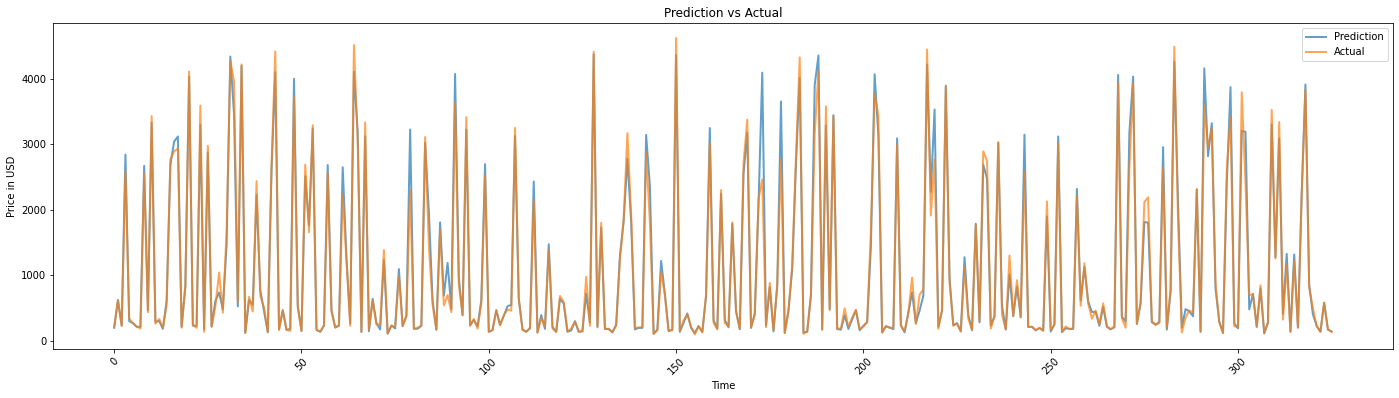

In [ ]:
# Visualize the dataset results by plotting
plt.figure(figsize=(24,6))
plt.plot(svm_prediction,label='Prediction', lw=2,alpha=0.7)
plt.plot(y_test,label='Actual', lw=2,alpha=0.7)
plt.title('Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **Ethereum Price Prediction using Time2Vec + LSTM Reinforcment Learning** 

In [30]:
!pip install keras-hypetune

     |████████████████████████████████| 965 kB 16.2 MB/s 
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.1.2
    Uninstalling hyperopt-0.1.2:
      Successfully uninstalled hyperopt-0.1.2


In [31]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential
from kerashypetune import KerasGridSearch


In [32]:
col_list = ["Date","Open","High","Low","Close","Adj Close","Volume"]
RLdata = pd.read_csv('/content/drive/MyDrive/CCTA Presentation and Project/ETH-USD.csv', usecols=col_list)
RLdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [33]:
RLdata = RLdata.dropna()
RLdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 1631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1632 non-null   object 
 1   Open       1632 non-null   float64
 2   High       1632 non-null   float64
 3   Low        1632 non-null   float64
 4   Close      1632 non-null   float64
 5   Adj Close  1632 non-null   float64
 6   Volume     1632 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 102.0+ KB


In [35]:
RLdata = RLdata.reset_index()
RLdata

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,1,1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2,2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,3,3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,4,4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...,...,...
1627,1627,1627,2022-04-24,2937.347168,2961.882080,2922.128662,2922.732666,2922.732666,9696829579
1628,1628,1628,2022-04-25,2922.990234,3018.415527,2804.507080,3009.393555,3009.393555,22332690614
1629,1629,1629,2022-04-26,3008.946289,3026.415039,2786.253174,2808.298340,2808.298340,19052045399
1630,1630,1630,2022-04-27,2808.645996,2911.877441,2802.273438,2888.929688,2888.929688,17419284041


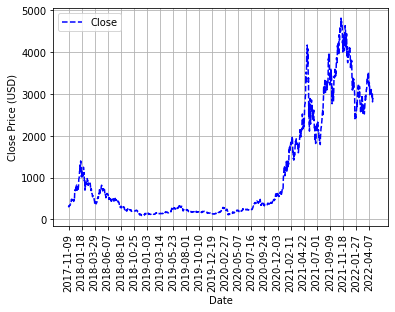

In [44]:
x_ticks = []
x_labels = []
temp = 0
x = []
y = []
for i in range(len(RLdata['Date'])):
  if(i%70==0):
    temp = RLdata['Close'][i]
    x_ticks.append(i)
    x_labels.append(RLdata['Date'][i])
    x.append(i)
    y.append(RLdata['Close'][i])
    temp=temp+1

axes= plt.axes()
plt.plot(RLdata['Date'],RLdata['Close'],'--b')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.legend(['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.xticks(rotation=90)
axes.grid()
plt.show()

## *Data Normalization*
#### -> Improves the accuracy
#### -> Remove redundant (duplicated and unnecessary) data
#### -> Training time will be more if not do it

In [45]:
scaler = MinMaxScaler()

close_price = RLdata.Close.values.reshape(-1, 1) # -1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis

scaled_close = scaler.fit_transform(close_price) # This method performs fit and transform on the input data at a single time and converts the data points

### Define Time2Vec + LSTM model

In [46]:
from tensorflow.keras import layers, Model, backend as K
from tensorflow.keras import backend as K # Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the “backend engine” of Keras.
from tensorflow.keras.layers import Layer

In [47]:
class T2V(Layer):
    
    def __init__(self, output_dim=None, **kwargs):
        self.output_dim = output_dim
        super(T2V, self).__init__(**kwargs)
        
    def build(self, input_shape):

        self.W = self.add_weight(name='W',
                                shape=(input_shape[-1], self.output_dim),
                                initializer='uniform',
                                trainable=True)

        self.P = self.add_weight(name='P',
                                shape=(input_shape[1], self.output_dim),
                                initializer='uniform',
                                trainable=True)

        self.w = self.add_weight(name='w',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        self.p = self.add_weight(name='p',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        super(T2V, self).build(input_shape)
        
    def call(self, x):
        
        original = self.w * x + self.p #if i = 0
        sin_trans = K.sin(K.dot(x, self.W) + self.P) # Frequecy and phase shift of sine function, learnable parameters. if 1 <= i <= k
        
        return K.concatenate([sin_trans, original], -1)

In [48]:
# To create X and Y for you
def gen_sequence(id_df, seq_length, seq_cols):
    
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]

    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

def gen_labels(id_df, seq_length, label):
    
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    
    return data_matrix[seq_length:num_elements, :]

In [49]:
def T2V_NN(param, dim):
    
    inp = layers.Input(shape=(dim,1))
    x = T2V(param['t2v_dim'])(inp)
    x = LSTM(param['unit'], activation=param['act'])(x)
    x = Dense(1)(x)
    
    m = Model(inp, x)
    m.compile(loss='mse', optimizer='adam')
    
    return m

In [51]:
# Prepare data to feed models
SEQ_LEN = 20 # pattern X is the size of Seq_len (e.g. use the first 20 days to predict 21st day)
X, Y = [], []
for sequence in gen_sequence(RLdata, SEQ_LEN, ['Close']):
    X.append(sequence)
    
for sequence in gen_labels(RLdata, SEQ_LEN, ['Close']):
    Y.append(sequence)
    
X = np.asarray(X)
Y = np.asarray(Y)

In [52]:
# Train Test Split
train_dim = int(0.7*len(RLdata))
X_train, X_test = X[:train_dim], X[train_dim:]
y_train, y_test = Y[:train_dim], Y[train_dim:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1142, 20, 1) (1142, 1)
(470, 20, 1) (470, 1)


In [53]:
# Define parameter grid for hyperparameter optimization
param_grid = {
    'unit': [64,32],
    't2v_dim': [128,64,16],
    'lr': [1e-2,1e-3], 
    'act': ['elu','relu'], 
    'epochs': 20,
    'batch_size': [128,512,1024]
}

In [54]:
hypermodel = lambda x: T2V_NN(param=x, dim=SEQ_LEN)

kgs_t2v = KerasGridSearch(hypermodel, param_grid, monitor='val_loss', greater_is_better=False, tuner_verbose=1)
kgs_t2v.search(X_train, y_train, validation_split=0.2, shuffle=False)


72 trials detected for ('unit', 't2v_dim', 'lr', 'act', 'epochs', 'batch_size')

***** (1/72) *****
Search({'unit': 64, 't2v_dim': 128, 'lr': 0.01, 'act': 'elu', 'epochs': 20, 'batch_size': 128})
SCORE: 18636.00195 at epoch 10

***** (2/72) *****
Search({'unit': 64, 't2v_dim': 128, 'lr': 0.01, 'act': 'elu', 'epochs': 20, 'batch_size': 512})
SCORE: 14903.15723 at epoch 20

***** (3/72) *****
Search({'unit': 64, 't2v_dim': 128, 'lr': 0.01, 'act': 'elu', 'epochs': 20, 'batch_size': 1024})
SCORE: 140953.45312 at epoch 20

***** (4/72) *****
Search({'unit': 64, 't2v_dim': 128, 'lr': 0.01, 'act': 'relu', 'epochs': 20, 'batch_size': 128})
SCORE: 12325.69434 at epoch 6

***** (5/72) *****
Search({'unit': 64, 't2v_dim': 128, 'lr': 0.01, 'act': 'relu', 'epochs': 20, 'batch_size': 512})
SCORE: 28833.2793 at epoch 20

***** (6/72) *****
Search({'unit': 64, 't2v_dim': 128, 'lr': 0.01, 'act': 'relu', 'epochs': 20, 'batch_size': 1024})
SCORE: 19304.32617 at epoch 20

***** (7/72) *****
Search({'unit

### Application of the parameters coming from the Keras Grid Search with the best score

In [62]:
base_param = {
    'unit': 32,
    't2v_dim': 64,
    'lr': 1e-2, 
    'act': 'relu', 
    'epochs': 20,
    'batch_size': 1024
}

In [63]:
model = T2V_NN(param=base_param, dim=SEQ_LEN)

In [64]:
model.summary()

Model: "model_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_74 (InputLayer)       [(None, 20, 1)]           0         
                                                                 
 t2v_73 (T2V)                (None, 20, 65)            1384      
                                                                 
 lstm_73 (LSTM)              (None, 32)                12544     
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,961
Trainable params: 13,961
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, shuffle=False)

Epoch 1/20
29/29 [==============================] - 2s 26ms/step - loss: 157611.2031 - val_loss: 197513.6719
Epoch 2/20
29/29 [==============================] - 0s 15ms/step - loss: 138557.4688 - val_loss: 235583.4531
Epoch 3/20
29/29 [==============================] - 0s 16ms/step - loss: 44932.1406 - val_loss: 121623.9375
Epoch 4/20
29/29 [==============================] - 0s 15ms/step - loss: 78577.9297 - val_loss: 41607.4062
Epoch 5/20
29/29 [==============================] - 0s 15ms/step - loss: 17404.4609 - val_loss: 43885.3281
Epoch 6/20
29/29 [==============================] - 0s 15ms/step - loss: 29015.6348 - val_loss: 87025.6016
Epoch 7/20
29/29 [==============================] - 0s 16ms/step - loss: 39534.3359 - val_loss: 16883.2402
Epoch 8/20
29/29 [==============================] - 0s 15ms/step - loss: 16810.4785 - val_loss: 21550.9277
Epoch 9/20
29/29 [==============================] - 0s 16ms/step - loss: 11537.4502 - val_loss: 28679.4883
Epoch 10/20
29/29 [=============

In [66]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 5ms/step - loss: 246814.7344


246814.734375

###Graph plot to see the loss variables vs epoch

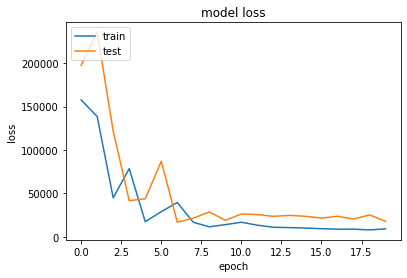

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Graph plot to see the actual vs predicted price

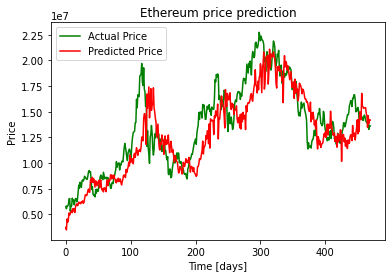

In [68]:
y_hat = model.predict(X_test)

# scale in a way that is easier to visualize in the graph (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
# inverse_transform: Scale back the data to the original representation
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

plt.show()